In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [22]:
df_nabil = pd.read_csv('Data_sets/NABIL_price_history.csv')
df_sadbl = pd.read_csv('Data_sets/SADBL_price_history.csv')
df_cbbl = pd.read_csv('Data_sets/CBBL_price_history.csv')

In [23]:
df_nabil.columns

Index(['Date', 'Ltp'], dtype='object')

In [24]:
import pandas as pd

dfs = [df_nabil, df_sadbl, df_cbbl]

for df in dfs:
    
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Sort by date in ascending order
    df.sort_values(by='Date', ascending=True, inplace=True)

In [25]:
df_nabil = df_nabil.loc[df_nabil['Date'] >= '2015-01-01']
df_cbbl = df_cbbl.loc[df_cbbl['Date'] >= '2015-01-01']
df_sadbl = df_sadbl.loc[df_sadbl['Date'] >= '2015-01-01']


df_nabil.reset_index(drop=True, inplace=True)
df_cbbl.reset_index(drop=True, inplace=True)
df_sadbl.reset_index(drop=True, inplace=True)
# Optionally reset the index after filtering
df_nabil.set_index('Date', inplace=True)
df_cbbl.set_index('Date', inplace=True)
df_sadbl.set_index('Date', inplace=True)

In [26]:
df_nabil.head()

,Ltp
Date,
2015-01-01,"1,875.00"
2015-01-04,"1,880.00"
2015-01-05,"1,886.00"
2015-01-06,"1,852.00"
2015-01-07,"1,885.00"


In [27]:
for df in [df_nabil, df_sadbl, df_cbbl]:
    # Remove commas from the 'Ltp' column
    df['Ltp'] = df['Ltp'].astype(str).str.replace(',', '', regex=False)

    # Ensure that the 'Ltp' column is numeric (if required for further analysis)
    df['Ltp'] = pd.to_numeric(df['Ltp'], errors='coerce')

    # Optionally, you can display the first few rows to verify the changes
    print(df.head())

               Ltp
Date              
2015-01-01  1875.0
2015-01-04  1880.0
2015-01-05  1886.0
2015-01-06  1852.0
2015-01-07  1885.0
              Ltp
Date             
2015-01-01  294.0
2015-01-04  296.0
2015-01-05  300.0
2015-01-06  295.0
2015-01-07  307.0
               Ltp
Date              
2015-01-01  1290.0
2015-01-04  1366.0
2015-01-05  1350.0
2015-01-07  1404.0
2015-01-08  1425.0


C:\Users\adabh\AppData\Local\Temp\ipykernel_19908\451976361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ltp'] = df['Ltp'].astype(str).str.replace(',', '', regex=False)
C:\Users\adabh\AppData\Local\Temp\ipykernel_19908\451976361.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ltp'] = pd.to_numeric(df['Ltp'], errors='coerce')
C:\Users\adabh\AppData\Local\Temp\ipykernel_19908\451976361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [28]:
df_nabil.head()


,Ltp
Date,
2015-01-01,1875.0
2015-01-04,1880.0
2015-01-05,1886.0
2015-01-06,1852.0
2015-01-07,1885.0


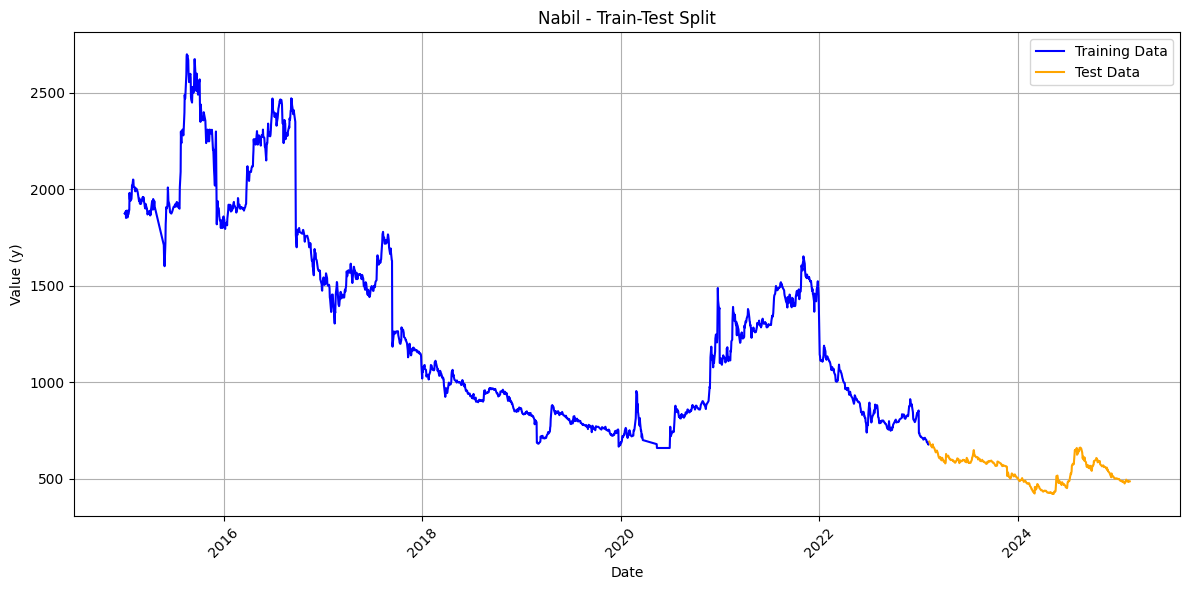

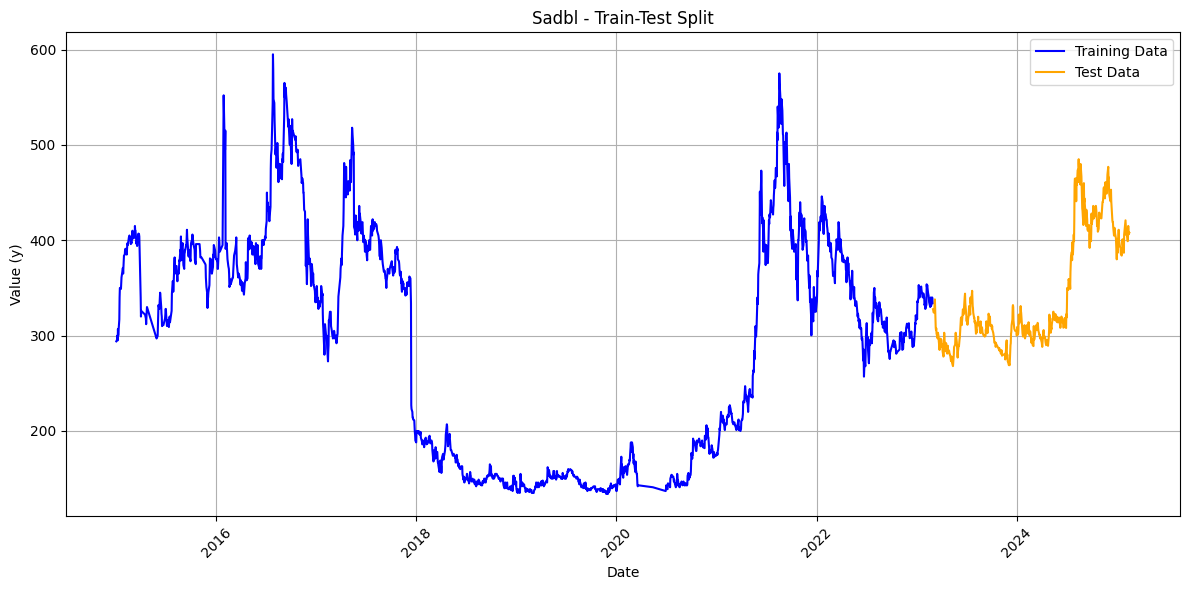

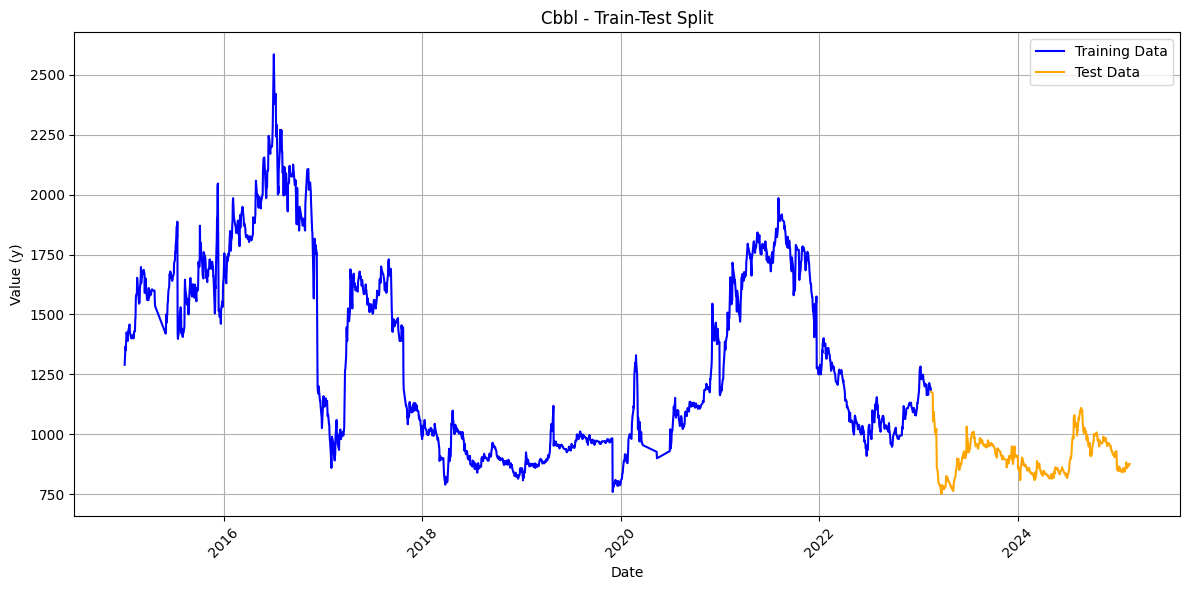

In [29]:
for df, name in zip([df_nabil, df_sadbl, df_cbbl], ['Nabil', 'Sadbl', 'Cbbl']):

    # Split data into train and test
    train_size = int(len(df) * 0.8)
    train, test = df[:train_size], df[train_size:]

    # Plotting the train-test split
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['Ltp'], label='Training Data', color='blue')  # Replace 'y' with actual column
    plt.plot(test.index, test['Ltp'], label='Test Data', color='orange')  # Replace 'y' with actual column
    plt.title(f'{name} - Train-Test Split')
    plt.xlabel('Date')
    plt.ylabel('Value (y)')  # Adjust 'y' based on the actual column you're analyzing
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

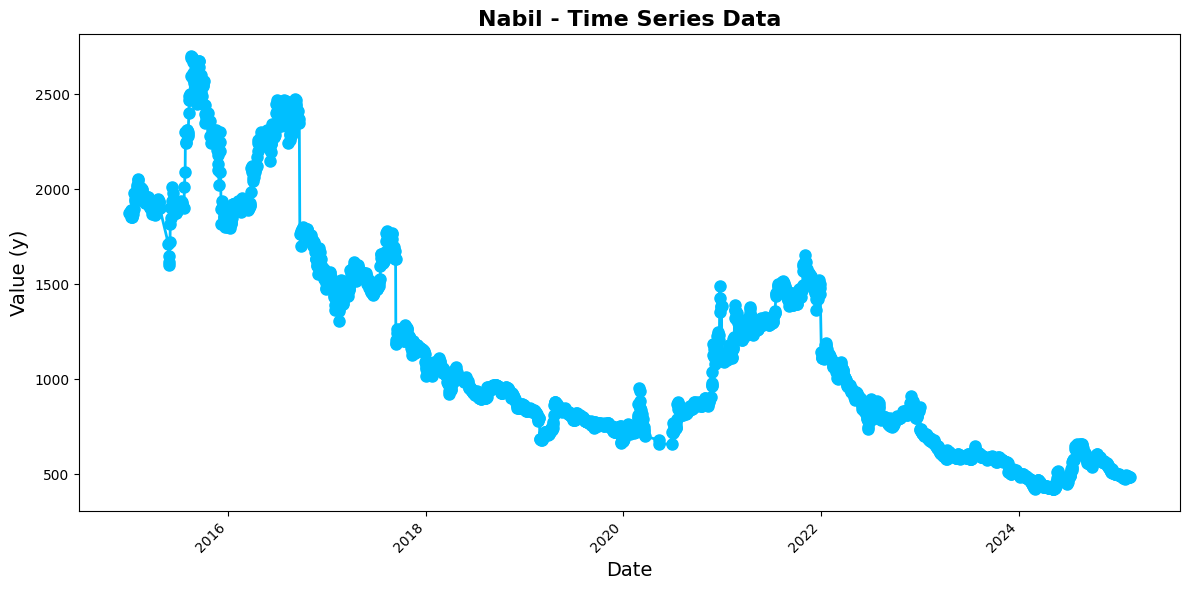

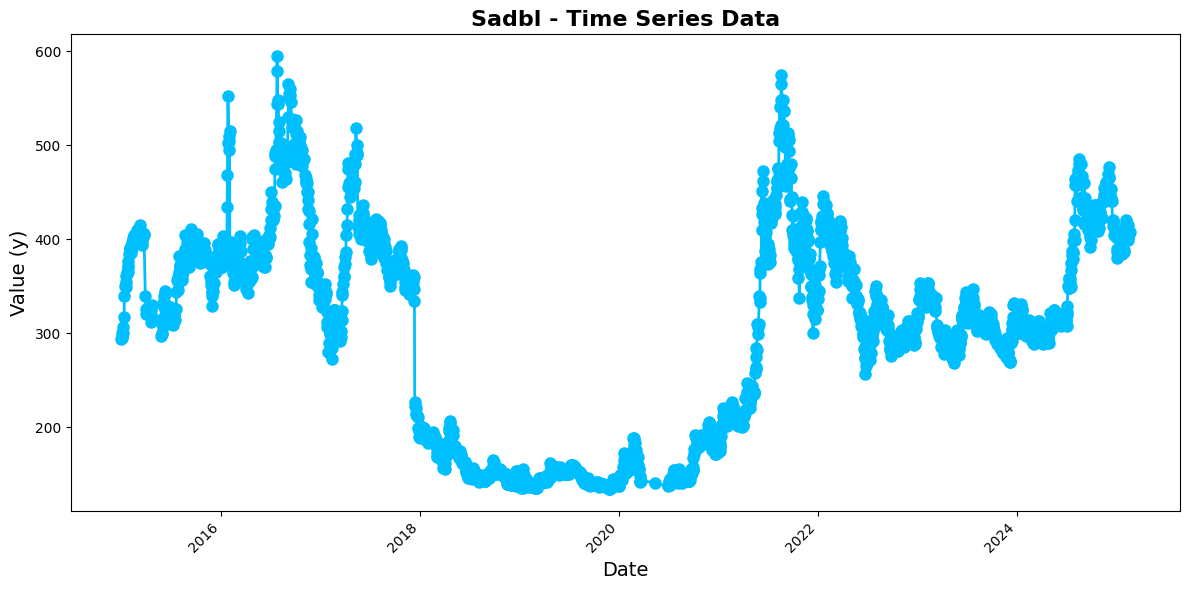

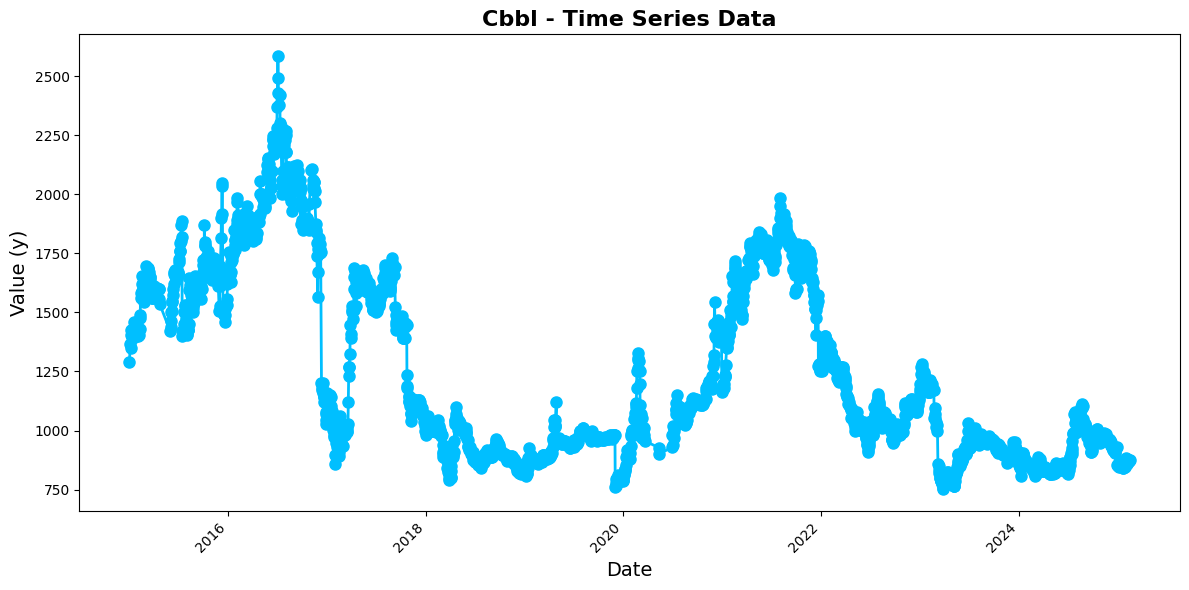

In [56]:
import matplotlib.pyplot as plt

# List of DataFrames and their corresponding names
dfs = [df_nabil, df_sadbl, df_cbbl]
names = ['Nabil', 'Sadbl', 'Cbbl']

# Loop through each DataFrame and plot
for df, name in zip(dfs, names):
    # Plotting the data for each company
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Ltp'], marker='o', linestyle='-', color='deepskyblue',
             markersize=8, linewidth=2)
    plt.title(f'{name} - Time Series Data', fontsize=16, weight='bold')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Value (y)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [30]:
from statsmodels.tsa.stattools import adfuller

# List of DataFrames and their corresponding names
dfs = [df_nabil, df_sadbl, df_cbbl]
names = ['Nabil', 'Sadbl', 'Cbbl']

# Loop through each DataFrame and apply the ADF test
for df, name in zip(dfs, names):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(df['Ltp'])
    
    # Print the ADF statistic and p-value
    print(f"\n{name} - ADF Test Results:")
    print('ADF Statistic: ', result[0])
    print('p-value: ', result[1])
    
    # Interpret the result
    if result[1] < 0.05:
        print(f"The time series for {name} is likely stationary.")
    else:
        print(f"The time series for {name} is likely non-stationary. Differencing may be required.")



Nabil - ADF Test Results:
ADF Statistic:  -1.35939789047288
p-value:  0.6015791878416009
The time series for Nabil is likely non-stationary. Differencing may be required.

Sadbl - ADF Test Results:
ADF Statistic:  -2.16400019324526
p-value:  0.2195696964534824
The time series for Sadbl is likely non-stationary. Differencing may be required.

Cbbl - ADF Test Results:
ADF Statistic:  -1.8217996237996048
p-value:  0.3696937475315922
The time series for Cbbl is likely non-stationary. Differencing may be required.


<Figure size 1200x800 with 0 Axes>

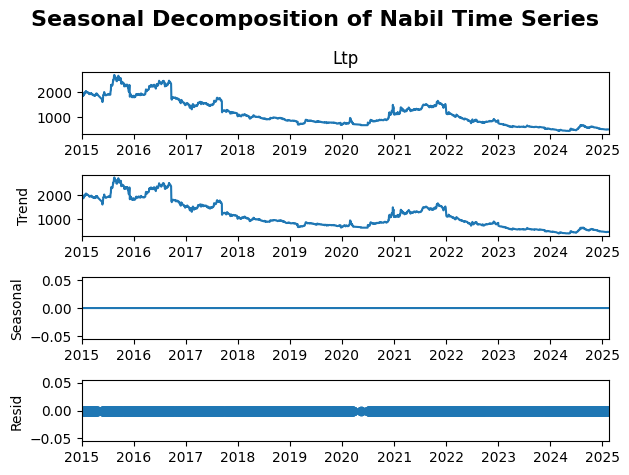

<Figure size 1200x800 with 0 Axes>

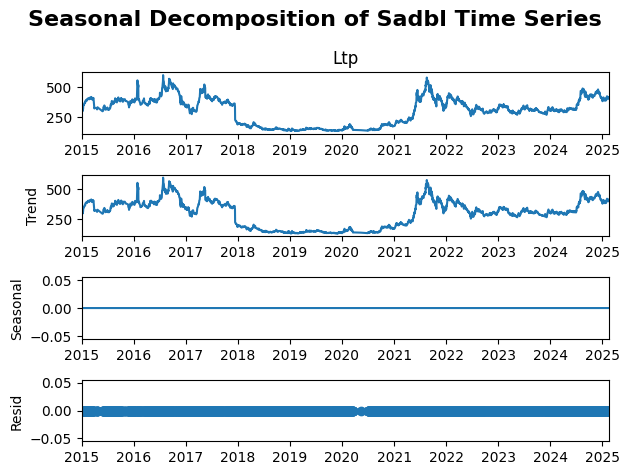

<Figure size 1200x800 with 0 Axes>

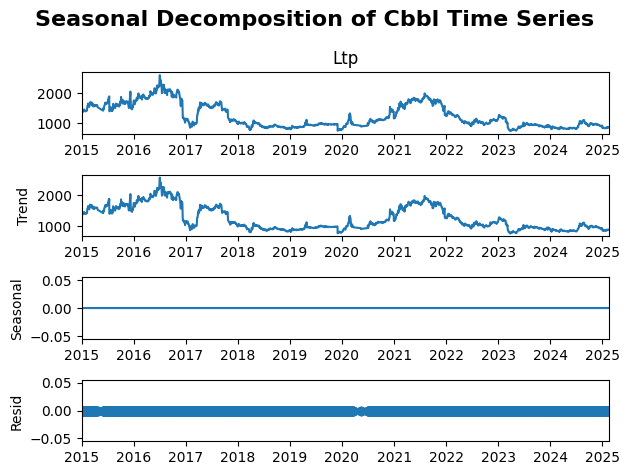

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# List of DataFrames and their corresponding names
dfs = [df_nabil, df_sadbl, df_cbbl]
names = ['Nabil', 'Sadbl', 'Cbbl']

# Loop through each DataFrame and apply seasonal decomposition
for df, name in zip(dfs, names):
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(df['Ltp'], model='additive', period=1)

    # Plot the decomposition
    plt.figure(figsize=(12, 8))
    decomposition.plot()
    plt.suptitle(f'Seasonal Decomposition of {name} Time Series', fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()


c:\Users\adabh\Documents\nepal_finance_institution_stock_predictor\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\adabh\Documents\nepal_finance_institution_stock_predictor\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\adabh\Documents\nepal_finance_institution_stock_predictor\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model Summary for CBBL:
                               SARIMAX Results                                
Dep. Variable:                    Ltp   No. Observations:                 1839
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9367.183
Date:                Sun, 16 Feb 2025   AIC                          18740.366
Time:                        18:48:38   BIC                          18756.915
Sample:                             0   HQIC                         18746.468
                               - 1839                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3715      0.358     -1.038      0.299      -1.073       0.330
ma.L1          0.4112      0.348      1.182      0.237      -0.271       1.093
sigma2      1563.1874      9

c:\Users\adabh\Documents\nepal_finance_institution_stock_predictor\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


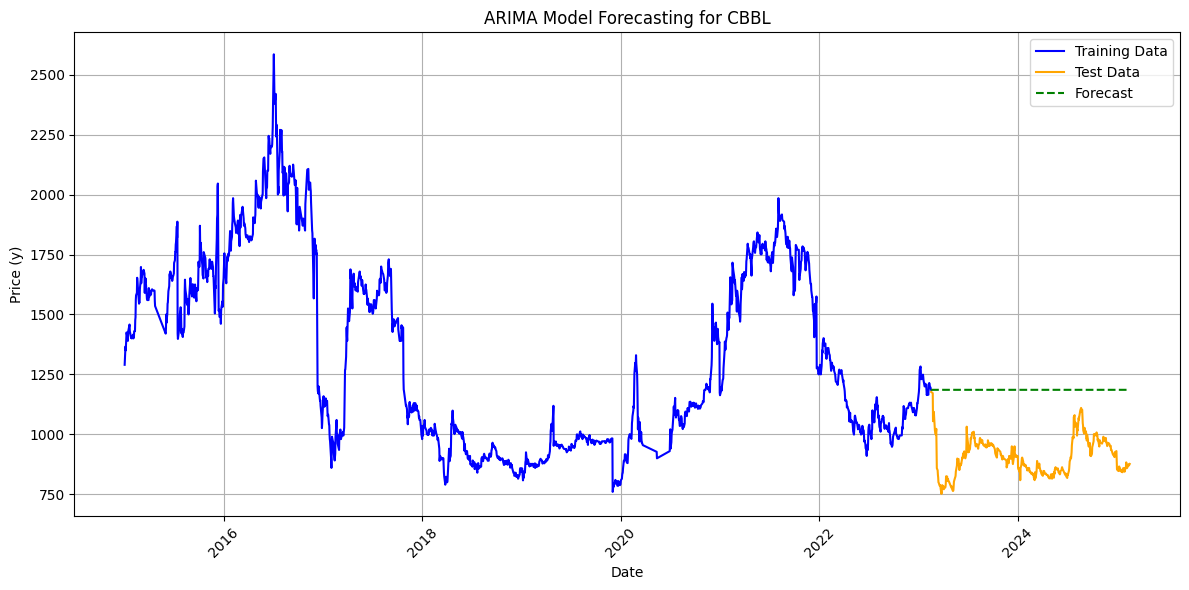

RMSE for CBBL: 291.8946
R-squared for CBBL: -13.3945


c:\Users\adabh\Documents\nepal_finance_institution_stock_predictor\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\adabh\Documents\nepal_finance_institution_stock_predictor\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\adabh\Documents\nepal_finance_institution_stock_predictor\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model Summary for NABIL:
                               SARIMAX Results                                
Dep. Variable:                    Ltp   No. Observations:                 1839
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9367.183
Date:                Sun, 16 Feb 2025   AIC                          18740.366
Time:                        18:48:39   BIC                          18756.915
Sample:                             0   HQIC                         18746.468
                               - 1839                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3715      0.358     -1.038      0.299      -1.073       0.330
ma.L1          0.4112      0.348      1.182      0.237      -0.271       1.093
sigma2      1563.1874      

c:\Users\adabh\Documents\nepal_finance_institution_stock_predictor\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


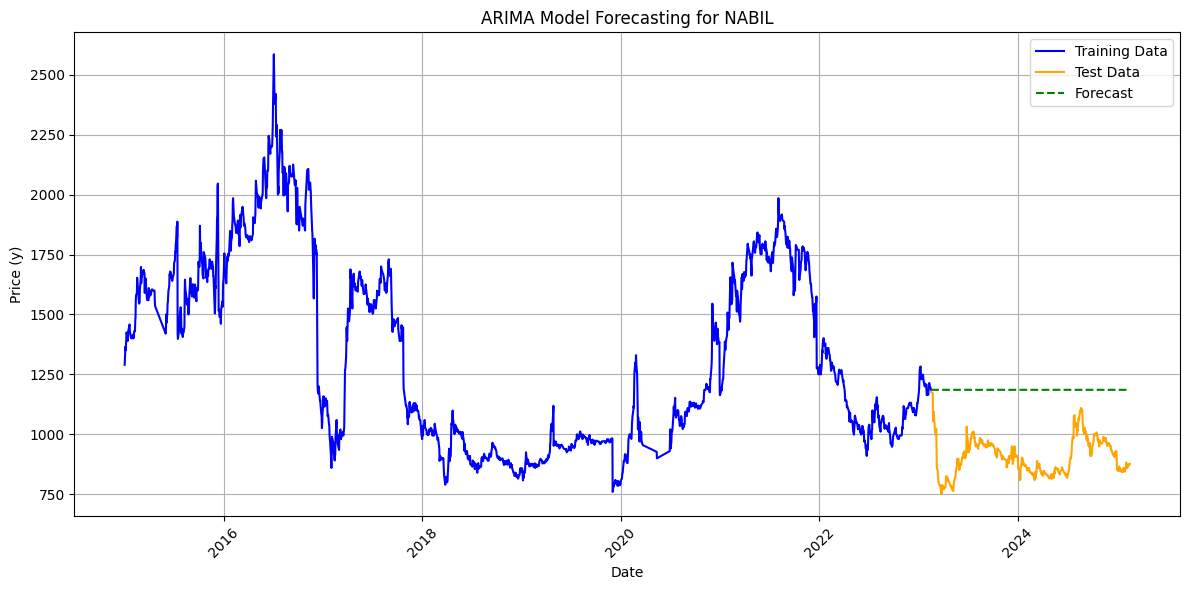

RMSE for NABIL: 291.8946
R-squared for NABIL: -13.3945


c:\Users\adabh\Documents\nepal_finance_institution_stock_predictor\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\adabh\Documents\nepal_finance_institution_stock_predictor\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\adabh\Documents\nepal_finance_institution_stock_predictor\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model Summary for SADBL:
                               SARIMAX Results                                
Dep. Variable:                    Ltp   No. Observations:                 1839
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9367.183
Date:                Sun, 16 Feb 2025   AIC                          18740.366
Time:                        18:48:39   BIC                          18756.915
Sample:                             0   HQIC                         18746.468
                               - 1839                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3715      0.358     -1.038      0.299      -1.073       0.330
ma.L1          0.4112      0.348      1.182      0.237      -0.271       1.093
sigma2      1563.1874      

c:\Users\adabh\Documents\nepal_finance_institution_stock_predictor\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


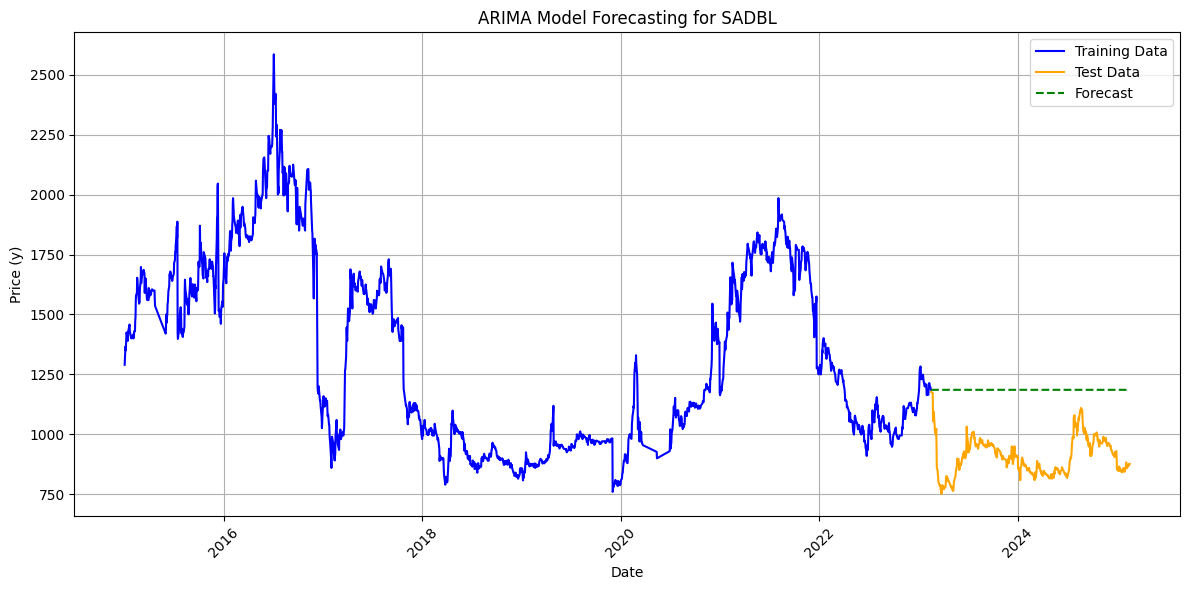

RMSE for SADBL: 291.8946
R-squared for SADBL: -13.3945


In [60]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# List of company symbols
symbols = ["CBBL", "NABIL", "SADBL"]

for symbol in symbols:

    # Fit the ARIMA model
    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit()

    # Print model summary
    print(f"Model Summary for {symbol}:")
    print(model_fit.summary())
    
    # Forecast for the test period
    forecast_steps = len(test)
    forecast = model_fit.forecast(steps=forecast_steps)
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Training Data', color='blue')
    plt.plot(test.index, test, label='Test Data', color='orange')
    plt.plot(test.index, forecast, label='Forecast', color='green', linestyle='--')
    plt.title(f'ARIMA Model Forecasting for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price (y)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Calculate RMSE and R-squared
    rmse = np.sqrt(mean_squared_error(test, forecast))
    r2 = r2_score(test, forecast)
    
    print(f"RMSE for {symbol}: {rmse:.4f}")
    print(f"R-squared for {symbol}: {r2:.4f}")


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Define the sequence creation function
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

# Define sequence length
sequence_length = 30

# List of DataFrames and their respective names
dfs = [df_nabil, df_sadbl, df_cbbl]  # Replace with your actual DataFrames
names = ['NABIL', 'SADBL', 'CBBL']  # Replace with the respective names

# Iterate through each DataFrame and prepare sequences
for df, name in zip(dfs, names):
    # Initialize scaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Scale the 'Ltp' column (or any relevant column you want)
    df_scaled = scaler.fit_transform(df[['Ltp']])  # Replace 'Ltp' with your actual column name
    
    # Create sequences and labels
    X, y = create_sequences(df_scaled, sequence_length)
    
    # Split the data into training and testing sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Reshape the data for LSTM input (3D shape: [samples, time steps, features])
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Now X_train, X_test, y_train, y_test are ready for training the LSTM model
    # You can proceed with your LSTM model as follows:

    # Define LSTM model
    model = Sequential([
        LSTM(150, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
        LSTM(150, activation='relu'),
        Dense(1)
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

    # You can also save the model or use it for predictions:
    model.save(f'ML_model/{name}_lstm_model.h5')  # Save the model for each company

    print(f"LSTM model for {name} trained and saved.")


Epoch 1/50
115/115 [==============================] - 7s 38ms/step - loss: 0.0104 - val_loss: 7.5109e-04
Epoch 2/50
115/115 [==============================] - 4s 34ms/step - loss: 0.0014 - val_loss: 7.4784e-04
Epoch 3/50
115/115 [==============================] - 4s 34ms/step - loss: 0.0014 - val_loss: 6.5250e-04
Epoch 4/50
115/115 [==============================] - 4s 34ms/step - loss: 0.0012 - val_loss: 6.0475e-04
Epoch 5/50
115/115 [==============================] - 4s 34ms/step - loss: 0.0011 - val_loss: 4.7705e-04
Epoch 6/50
115/115 [==============================] - 4s 36ms/step - loss: 8.6333e-04 - val_loss: 4.3905e-04
Epoch 7/50
115/115 [==============================] - 4s 36ms/step - loss: 8.1764e-04 - val_loss: 8.0080e-04
Epoch 8/50
115/115 [==============================] - 4s 35ms/step - loss: 7.1498e-04 - val_loss: 4.6093e-04
Epoch 9/50
115/115 [==============================] - 4s 36ms/step - loss: 7.3079e-04 - val_loss: 3.1011e-04
Epoch 10/50
115/115 [==================

15/15 [==============================] - 1s 15ms/step


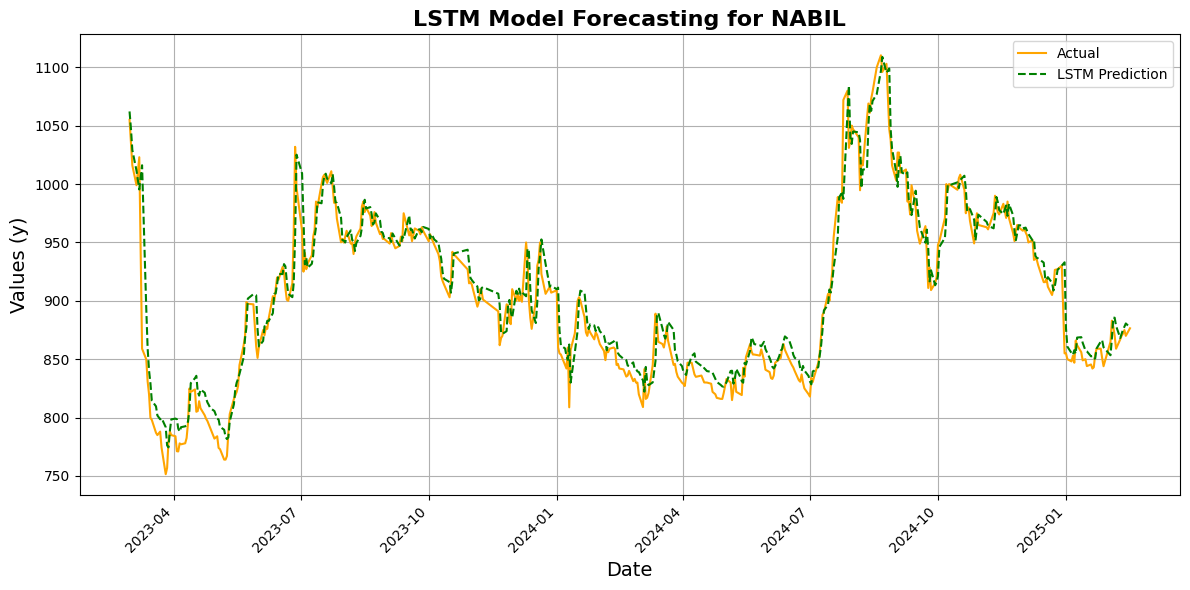

15/15 [==============================] - 0s 14ms/step


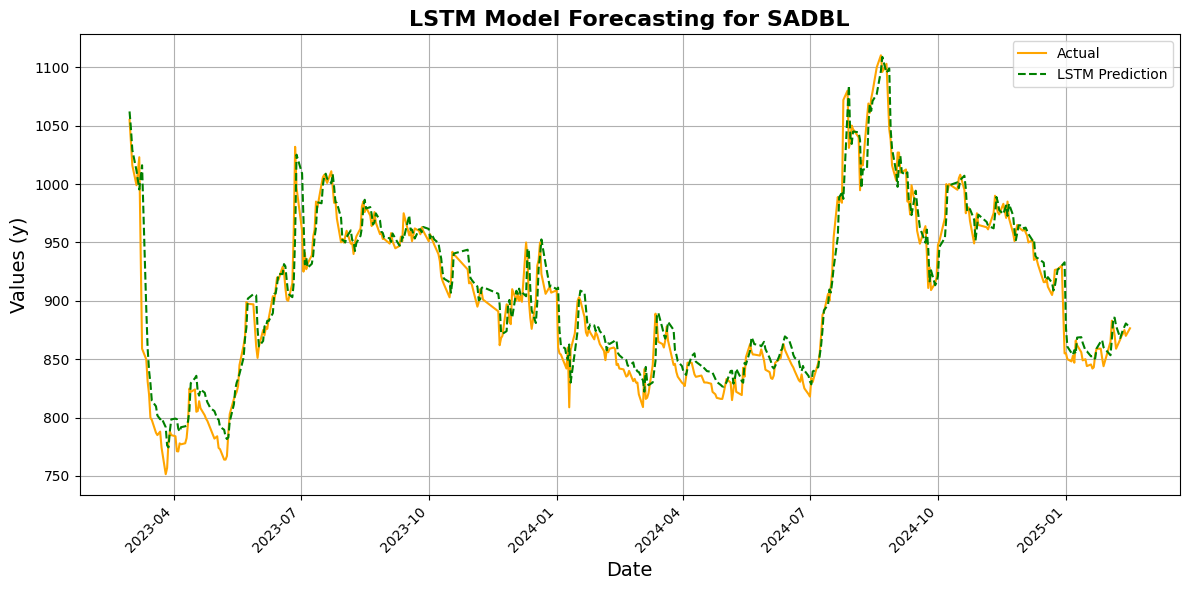

15/15 [==============================] - 0s 14ms/step


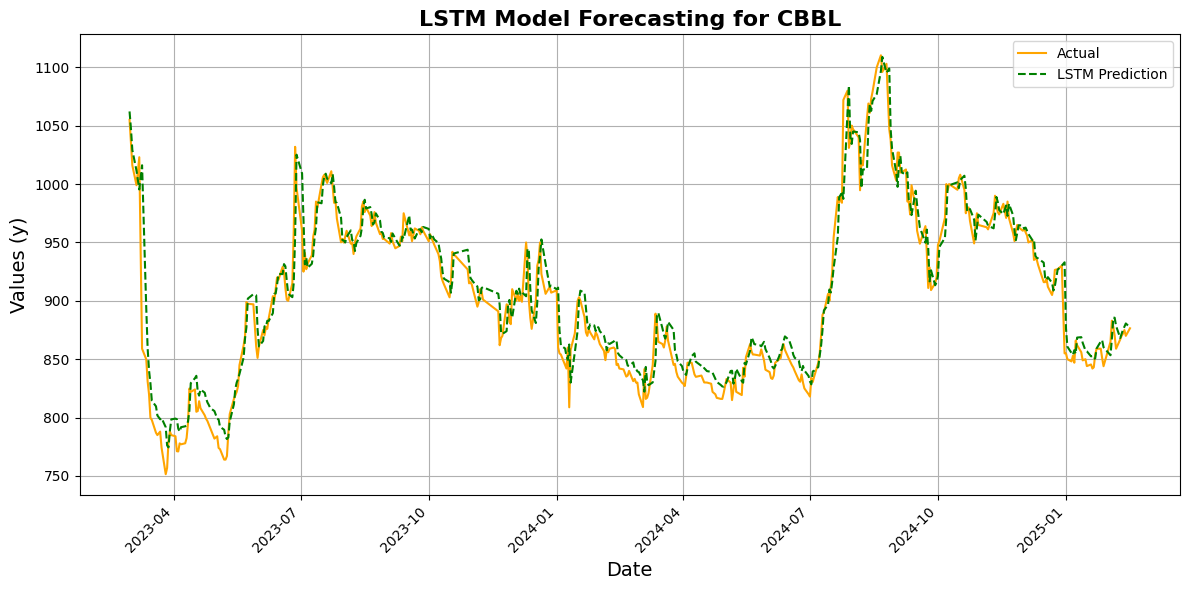

In [32]:
for df, name in zip(dfs, names):
    # Make predictions using the trained LSTM model
    y_pred = model.predict(X_test)

    # Rescale the predicted and actual values back to their original scale
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot the actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-len(y_test):], y_test_rescaled, label='Actual', color='orange')
    plt.plot(df.index[-len(y_pred):], y_pred_rescaled, label='LSTM Prediction', color='green', linestyle='--')
    plt.title(f'LSTM Model Forecasting for {name}', fontsize=16, weight='bold')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Values (y)', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

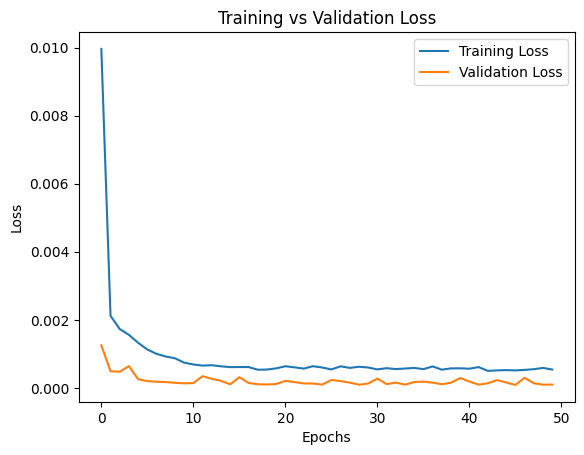

In [38]:

# Assuming `history` is the returned object from model.fit()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [39]:
predictions = model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, predictions)}")
print(f"Test R²: {r2_score(y_test, predictions)}")

15/15 [==============================] - 0s 28ms/step
Test MSE: 9.797282660144752e-05
Test R²: 0.938035872968955
